In [167]:
#Install required libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#Loading the main datasets

In [39]:
df_customers=pd.read_csv("C:/Users/Sivagami/Downloads/archive/olist_customers_dataset.csv")
df_orders=pd.read_csv("C:/Users/Sivagami/Downloads/archive/olist_orders_dataset.csv")
df_order_items=pd.read_csv("C:/Users/Sivagami/Downloads/archive/olist_order_items_dataset.csv")
df_sellers=pd.read_csv("C:/Users/Sivagami/Downloads/archive/olist_sellers_dataset.csv")
df_products=pd.read_csv("C:/Users/Sivagami/Downloads/archive/olist_products_dataset.csv")
df_reviews=pd.read_csv("C:/Users/Sivagami/Downloads/archive/olist_order_reviews_dataset.csv")
df_payments=pd.read_csv("C:/Users/Sivagami/Downloads/archive/olist_order_payments_dataset.csv")

In [40]:
df_orders.head() #displays the first 5rows in the orders dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [41]:
df_orders.shape #shows the number of rows and columns in the orders table

(99441, 8)

# Data Cleaning & Preprocessing

In [42]:
#checking for missing values 

In [43]:
print("Missing values in the orders table are:")
print(df_orders.isnull().sum()) #checking for missing values in orders dataset

Missing values in the orders table are:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [44]:
#Filling the missing values

In [45]:
df_orders['order_approved_at'].fillna('Unknown',inplace=True)
df_orders['order_delivered_carrier_date'].fillna('Unknown',inplace=True)
df_orders['order_delivered_customer_date'].fillna('Unknown',inplace=True)

In [46]:
#checking after filling the values as "Unknown"

In [47]:
print("Checking after filling the missing values:")
print(df_orders.isnull().sum())

Checking after filling the missing values:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [49]:
print(df_orders.dtypes) #Checking datatypes

After datatype conversion:
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
dtype: object


In [19]:
#checking for duplicates

In [20]:
duplicate_count=df_customers.duplicated().sum() #checking for duplicate values in customers table
print("Number of duplicate rows:",duplicate_count)

Number of duplicate rows: 0


In [21]:
#Merging tables

In [22]:
#Merged orders,order_items,customers,sellers,products table
df_merged=df_orders.merge(df_order_items, on='order_id',how='left')
df_merged=df_merged.merge(df_customers, on='customer_id',how='left')
df_merged=df_merged.merge(df_sellers, on='seller_id',how='left')
df_merged=df_merged.merge(df_products, on='product_id',how='left')

In [23]:
print(df_merged.head()) #After merging displaying first 5 rows

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

# EDA

In [24]:
#Overall customer behavior

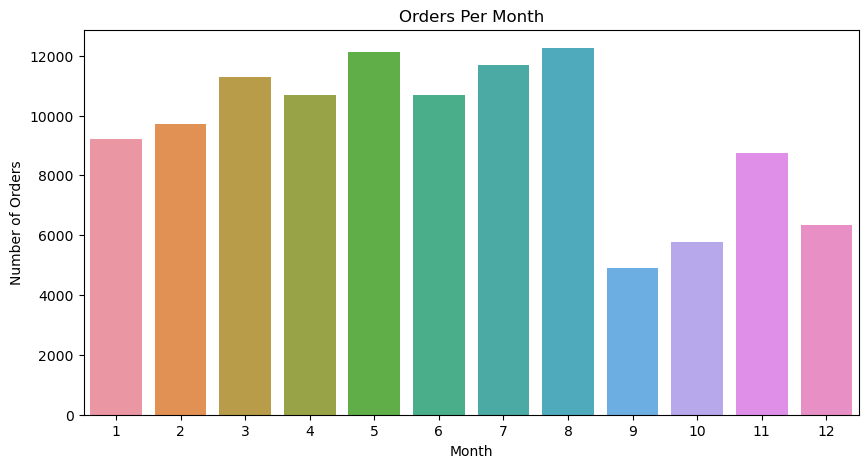

In [25]:
df_merged['order_purchase_month']=df_merged['order_purchase_timestamp'].dt.month
monthly_orders=df_merged.groupby('order_purchase_month')['order_id'].count()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_orders.index,y=monthly_orders.values)
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Orders Per Month')
plt.show()

In [26]:
#Top-selling product categories

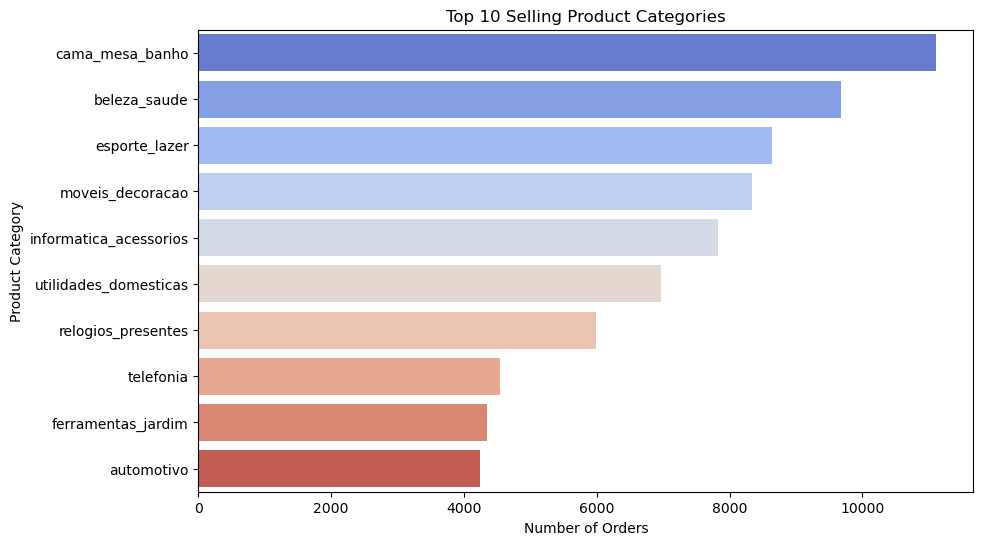

In [27]:
top_categories=df_merged['product_category_name'].value_counts().head(10)

#Set figure size
plt.figure(figsize=(10, 6))

#Create Bar Chart
sns.barplot(x=top_categories.values,y=top_categories.index,palette="coolwarm")

#Add title and labels
plt.title("Top 10 Selling Product Categories")
plt.xlabel("Number of Orders")
plt.ylabel("Product Category")

#Show plot
plt.show()

In [28]:
#Saving the merged file to as a new dataset
new_df=df_merged.to_csv("C:/Users/Sivagami/Downloads/archive/merged_dataset.csv",index=False)

In [29]:
new_df=pd.read_csv("C:/Users/Sivagami/Downloads/archive/merged_dataset.csv")

In [30]:
new_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_purchase_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,SP,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,7
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,MG,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,SP,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,2


In [31]:
print(new_df.info())  #checking the datatype after conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113425 non-null  object 
 5   order_delivered_carrier_date   113425 non-null  object 
 6   order_delivered_customer_date  113425 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   order_item_id                  112650 non-null  float64
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

# Understanding Anomalies

Anomalies are unusual patterns in data 
Examples:
✔️ Extremely high/low order values
✔️ Orders with negative delivery times

In [161]:
#Check Negative or Very Large Delivery Times

In [32]:
#Replacing the "unknown" with a default time
new_df["order_purchase_timestamp"]=new_df["order_purchase_timestamp"].replace("Unknown","2000-01-01 00:00:00")
new_df["order_purchase_timestamp"]=pd.to_datetime(new_df["order_purchase_timestamp"])

new_df["order_delivered_customer_date"]=new_df["order_delivered_customer_date"].replace("Unknown","2000-01-01 00:00:00")
new_df["order_delivered_customer_date"]=pd.to_datetime(new_df["order_delivered_customer_date"])


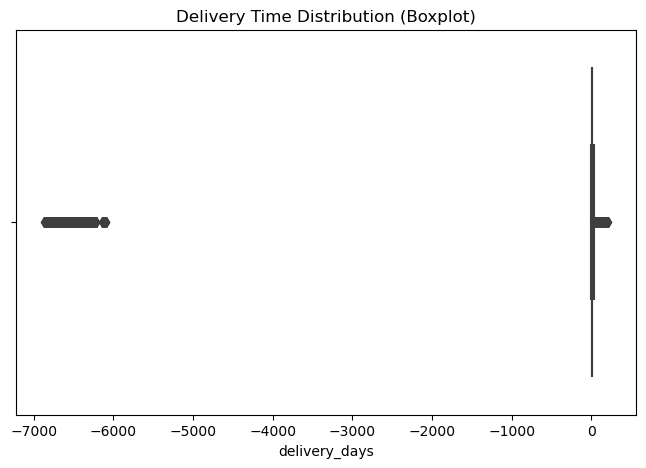

In [33]:
#Calculate delivery time in days
new_df["delivery_days"]=(new_df["order_delivered_customer_date"]-new_df["order_purchase_timestamp"]).dt.days

#Set figure size
plt.figure(figsize=(8, 5))

#Boxplot for delivery days
sns.boxplot(x=new_df["delivery_days"])

# Show plot
plt.title("Delivery Time Distribution (Boxplot)")
plt.show()


In [34]:
#Find negative or extreme values
anomalies=new_df[(new_df["delivery_days"]<0)|(new_df["delivery_days"]>60)]
print(anomalies)

                                order_id                       customer_id  \
6       136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
46      ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
118     0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
148     15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
185     6942b8da583c2f9957e990d028607019  52006a9383bf149a4fb24226b173106f   
...                                  ...                               ...   
113236  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
113284  e9e64a17afa9653aacf2616d94c005b8  b4cd0522e632e481f8eaf766a2646e86   
113324  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   
113325  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
113397  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

       order_status order_purchase_timestamp    order_approved_

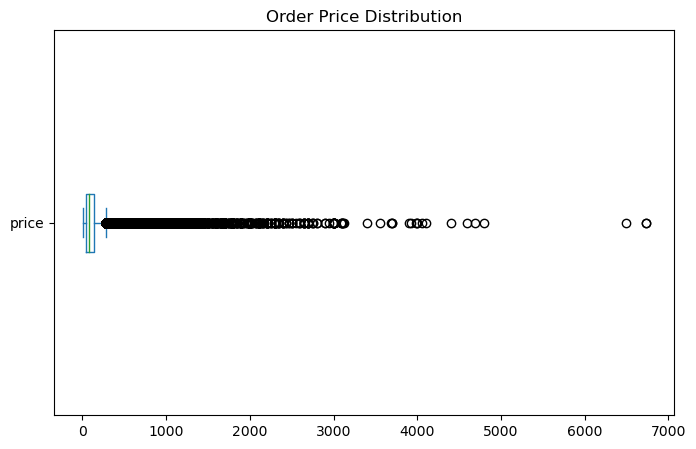

In [35]:
#Check Orders with Extremely High or Low Values
#Boxplot to visualize anomalies
plt.figure(figsize=(8,5))
new_df["price"].plot(kind="box", vert=False)
plt.title("Order Price Distribution")
plt.show()

In [36]:
#Find high-value outliers (above 99th percentile)
upper_limit=new_df["price"].quantile(0.99)
anomalies=new_df[new_df["price"]>upper_limit]
print(anomalies)

                                order_id                       customer_id  \
17      403b97836b0c04a622354cf531062e5f  738b086814c6fcc74b8cc583f8516ee3   
377     2b72a32a2c3e93fa260ca7655073886f  5265029daa29cc08d86b9f96cd99d03f   
388     ac64f79a33bfa575fc5a17e7926df3d5  51a8d592336a414fea21f12534b0f797   
392     6cb134bb285a64b0425d1fdaa00d4214  d854800a320bbb07b484f76894e4638f   
460     da8be3bb62e9bf01e2e1a3bfd74ebd1a  3f083b9f62e687be8d84684c7d54c8db   
...                                  ...                               ...   
112943  25a93076658202368073fb3697a3f4ef  1a0fba6c64f792517a1f8d8c88b8bbab   
113005  4f2a29346d25613d2e553a8d6381b006  3043e244f2c35c95554a613c30a7a332   
113007  f3d113574c163b8642fb44302c8fe0c9  7ca7b6bb5ab0b1ac2529e5c489cf3592   
113100  bfb1d0f7664c36a532d74c4cf0da37af  811e55e5f48c8f37832963ff509ce85b   
113334  2ff4dba9b7e65ee15034ed2b0004048d  f3721694bcec86501e4a19cf459d3b28   

       order_status order_purchase_timestamp    order_approved_